# Esame Laboratorio di Programmazione II - 27/06/2025


In [252]:
#librerie caricate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [ ]:

libri = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30], dtype=float)

#prezzo medio dei libri
media = libri.mean()
print(media)

#libri con prezzo maggiore della media
libri[libri > media]

#nuovo array con sconto del 10% ai libri sopra la media
libri2 = []
for i in range(len(libri)):
    if libri[i] > media:
        libri2.append(libri[i] - libri[i]*0.1) 
    else:
        libri2.append(libri[i])

libri2 = np.array(libri2, dtype=float)       
print(libri2)

18.983000000000004
[14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

[ 19  35  59  81  97 107 125 138 148 161 179 201 217 237 249 266 289 306
 320 335]
[  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]


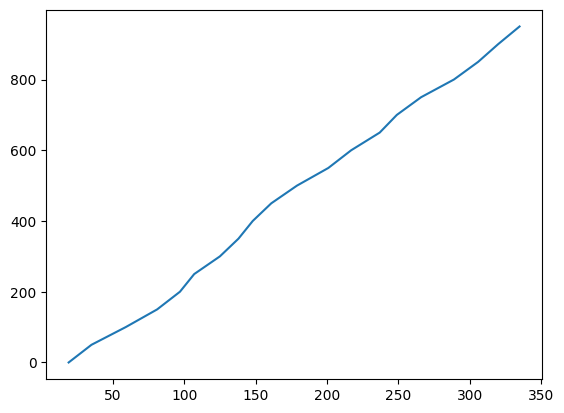

In [259]:
def lancio_moneta():
    #croce 0 p=2/3 e testa 1 p=1/3
    lancio = np.random.choice([0,1], 1000, p=[2/3, 1/3])
    return lancio

#array che contiene i risultati
lanci1000 = np.array(lancio_moneta())

#propor
lanciCum = []
index=0
tmp = 0
for i in range(20):
    for j in range(50):
        tmp += lanci1000[j+index]
    lanciCum.append(tmp)
    index += 50
    
#proporzione di teste dopo ogni 50 lanci
lanciCum = np.array(lanciCum)
print(lanciCum)

x = np.arange(0,1000,50)
print(x)

#grafico proporzione cumulativa nel tempo
plt.plot(lanciCum, x)



## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [260]:
def mat_normalizzata(mat):
    med = mat.mean()
    dev = np.std(mat)
    print(med, dev)

    Normmat = (mat - med) / dev
    return Normmat

mat = np.random.normal(5, 2, 60).reshape(6,10)
norm = mat_normalizzata(mat)
norm

4.912780613329267 2.0996235713916054


array([[-1.24197261,  0.2754654 , -1.63062776,  0.09311899, -1.68631287,
         0.55364536, -2.40574433,  0.09522936, -0.80322299, -1.45614358],
       [ 0.28882193, -1.11664092, -2.03130865,  1.53217469,  1.11249567,
        -0.43166951, -0.26995415,  0.60562064,  0.26823651,  0.34695536],
       [-0.07757581,  1.84067588, -2.16785451,  0.76552147, -0.28185954,
        -0.03866948,  1.02123709,  1.89827524, -1.05211613, -0.39958249],
       [-1.0609096 , -0.79420298, -0.25313129,  0.23887273,  1.83659244,
        -0.85412674, -0.00710053,  0.57079578,  1.45633264,  1.30105621],
       [ 1.57173643,  0.89457528,  0.13148494, -0.08139673,  0.13761336,
         0.282472  , -0.40512792,  0.08625447,  0.17729394, -1.34597609],
       [ 0.84540222, -0.89319596,  0.89483245,  0.06574726,  0.53855933,
        -0.18495473,  0.26377145,  0.720431  ,  0.71153102, -0.45145065]])

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155

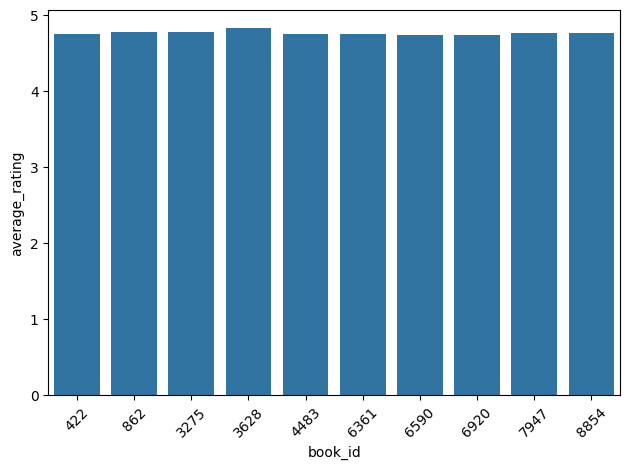

<Axes: xlabel='average_rating'>

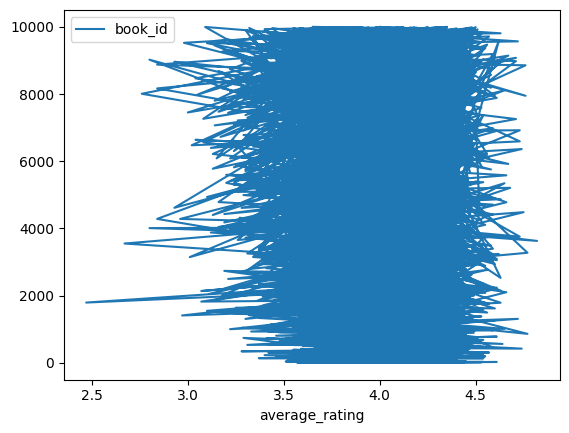

In [262]:

libri = pd.read_csv("books.csv")
print(libri.head(3))

libri['engagement_score'] = libri['average_rating'] * np.log10(1 + libri['ratings_count'])

index = libri['engagement_score'].argmax()
max = libri.loc[index]
max#libro con il valore massimo di engagement_score

libriavg = libri[libri['average_rating'] > 4.5]
libriavg
#libir con la valutazione media > 4.5

libriscore = libri.sort_values(by='average_rating', ascending=False).head(10)

#grafico a barre con 10 libri iìcon valore piu alto
sns.barplot(libriscore, x='book_id', y='average_rating')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#grafico a linee della avarege_rating ordinando il dataset per ratings_count
libri.sort_values(by='ratings_count', ascending=True).plot('average_rating',np.arange(0,6,100))




## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


age                                54
workclass                         NaN
fnlwgt                         180211
education                Some-college
education-num                      10
marital-status     Married-civ-spouse
occupation                        NaN
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     60
native-country                  South
income                           >50K
Name: 27, dtype: object
(32561, 15)
10.946058861758425
30.573657641119777


C:\Users\s321509\AppData\Local\Temp\ipykernel_8492\2387103007.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult['workclass'].fillna(modaWork, inplace=True)
C:\Users\s321509\AppData\Local\Temp\ipykernel_8492\2387103007.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

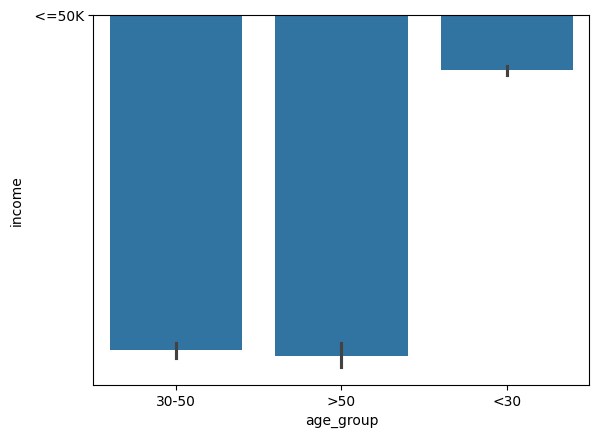

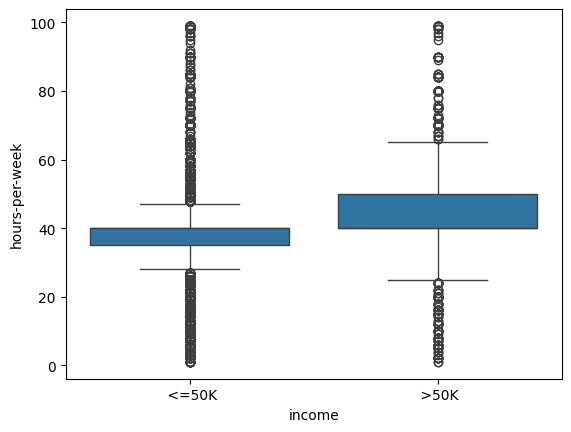

In [266]:
adult = pd.read_csv("adult_con_titoli.csv", na_values=" ?")
print(adult.loc[27])

print(adult.shape)

adult.isna().sum()

modaWork = adult["workclass"].mode()[0]
adult['workclass'].fillna(modaWork, inplace=True)

modaOcc = adult["occupation"].mode()[0]
adult['occupation'].fillna(modaOcc, inplace=True)

modaNative = adult["native-country"].mode()[0]
adult['native-country'].fillna(modaNative, inplace=True)

adult.groupby('sex')['age'].mean()

FemMin = adult.groupby('sex')['income'].value_counts()[0]
FemMag = adult.groupby('sex')['income'].value_counts()[1]

MasMin = adult.groupby('sex')['income'].value_counts()[2]
MasMag = adult.groupby('sex')['income'].value_counts()[3]

#adult.groupby('sex')['income'].value_counts(), FemMin, FemMag, MasMin, MasMag

PercentualeF =FemMag / (FemMin + FemMag) *100
PercentualeM =MasMag / (MasMin + MasMag) *100

print(PercentualeF)
print(PercentualeM)

#inizializziamo la nuova colonna
adult['age_group'] = adult['age']

#per ogni riga verifichiamo l'eta della persona e dopodiche a seconda dell' eta la mettiamo in una certa fascia
for i in range(adult.shape[0]):
    if adult['age'].loc[i] < 30:
        adult['age_group'].loc[i] = '<30'

    elif adult['age'].loc[i] <= 50:

        adult['age_group'].loc[i] = '30-50'
    else:
        adult['age_group'].loc[i] = '>50'


sns.barplot(adult, x='age_group', y='income')
plt.show()
sns.boxplot(adult, x='income', y='hours-per-week')
plt.show()


## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

0.3725667684287983 0.48589352726042023


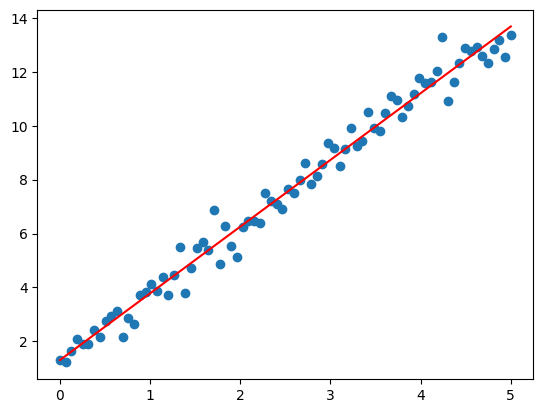

In [263]:
x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

def func(x,a,b):
    return a*x + b

popt, popc = sp.optimize.curve_fit(func,x,y)

pred = func(x,popt[0], popt[1])

mae = np.mean(np.abs(y - pred))
rmse= np.sqrt(np.mean((y - pred)**2))
print(mae, rmse)

plt.scatter(x, y)
plt.plot(x,pred, color='red')
